In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/areum/Downloads/drive-download-20180318T012728Z-001/datasets/cookie_cats.csv')

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'sum_gamerounds')

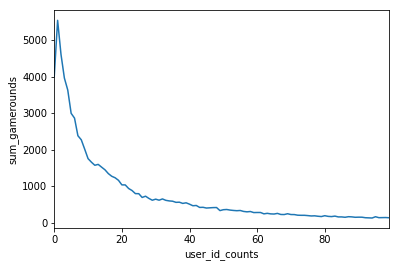

In [6]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()

ax=plot_df[:100].plot()
ax.set_xlabel('user_id_counts')
ax.set_ylabel('sum_gamerounds')

## Retention_1 Bootstrap Sampling

In [7]:
# 1-day retention rate

df['retention_1'].sum()/df['retention_1'].count()
#df['retention_1'].mean()

0.44520950448502589

In [8]:
# 1-day retention rate by version

df.groupby('version')['retention_1'].sum() / df.groupby('version')['retention_1'].count()
#df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

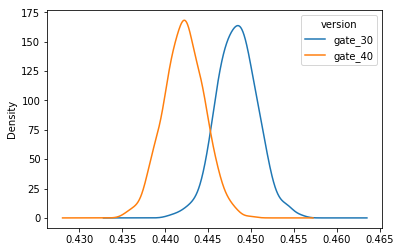

In [9]:
# Creating a list with bootstrapped means for each AB-group

boot_mean_list = []
for i in range(0, 500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_list.append(boot_mean)

boot_mean_df = pd.DataFrame(boot_mean_list)
boot_mean_df.plot(kind='kde')

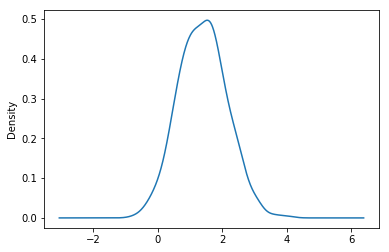

In [10]:
boot_mean_df['diff'] = (boot_mean_df['gate_30'] - boot_mean_df['gate_40']) / boot_mean_df['gate_40'] * 100

ax = boot_mean_df['diff'].plot(kind='kde')

In [11]:
prob = (boot_mean_df['diff'] > 0).sum() / boot_mean_df['diff'].count()

print(prob)

0.97


## Retention_7 Bootstrap Sampling

In [12]:
# 7-day retention rate

df['retention_7'].sum() / df['retention_7'].count()

0.1860648194347426

In [13]:
# 7-day retention rate by version

df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

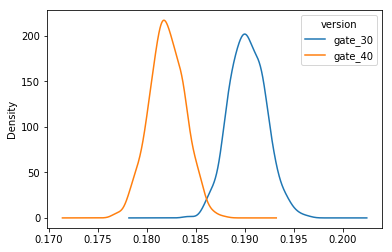

In [14]:
# Creating a list with bootstrapped means for each AB-group

boot_mean_7_list = []
for i in range(0, 500):
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_mean_7_list.append(boot_mean_7)

boot_mean_7_df = pd.DataFrame(boot_mean_7_list)
boot_mean_7_df.plot(kind='kde')

In [15]:
boot_mean_7_df['diff'] = (boot_mean_7_df['gate_30'] - boot_mean_7_df['gate_40'])/boot_mean_7_df['gate_40']

prob_7 = (boot_mean_7_df['diff'] > 0).sum() / boot_mean_7_df['diff'].count()
print(prob_7)

1.0
